# Portfolio 4 - YouTube

Using a dataset of YouTube channels, analyze performance patterns, including subscriber count, views, likes, and comments across content categories. Identify relationships between channel owners' demographic data, usernames, and external links, and channel performance metrics. Explore the predictability of subscriber count based on factors like likes and comments, and assess if these predictions are consistent across different channel categories or content types.

Columns:

Rank || Username || Categories || Subscribers || Visits || Likes || Comments || Links

**Rank:** The ranking of the YouTube channel

**Username:** Username of the channel

**Categories:** Type of content produced

**Subscribers:** The total subscriber count

**Visits:** How many people visits the channel

**Comments:** The number of comments the channel has

**Links:** The physical link of the channel

In [1]:
#libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
ds = "files/youtube_dataset.csv"
df = pd.read_csv(ds)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         1000 non-null   int64 
 1   Username     1000 non-null   object
 2   Categories   1000 non-null   object
 3   Subscribers  1000 non-null   object
 4   Country      1000 non-null   object
 5   Visits       1000 non-null   object
 6   Likes        1000 non-null   object
 7   Comments     1000 non-null   object
 8   Links        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


### Converting Features into Numeric Values

In [4]:
# Remove commas from the columns with numeric values
df['Subscribers'] = df['Subscribers'].str.replace(',', '')
df['Visits'] = df['Visits'].str.replace(',', '')
df['Likes'] = df['Likes'].str.replace(',', '')
df['Comments'] = df['Comments'].str.replace(',', '')

In [5]:
# Convert "Subscribers" column to numeric (integer)
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce').astype("float")

# Convert "Visits" column to numeric (integer)
df['Visits'] = pd.to_numeric(df['Visits'], errors='coerce').astype('Int64')

# Convert "Likes" column to numeric (integer)
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').astype('Int64')

# Convert "Comments" column to numeric (integer)
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce').astype('Int64')

Had to convert object features into numeric features in this way because the encoder only converts into 3 digit numbers.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   1000 non-null   object 
 3   Subscribers  1000 non-null   float64
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   Int64  
 6   Likes        1000 non-null   Int64  
 7   Comments     1000 non-null   Int64  
 8   Links        1000 non-null   object 
dtypes: Int64(3), float64(1), int64(1), object(4)
memory usage: 73.4+ KB


### Analysing Dataframe

In [7]:
df.head(1000)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,249500000.0,IN,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,183500000.0,US,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,165500000.0,US,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,162600000.0,IN,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,113500000.0,US,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,11700000.0,KR,397400,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Film,11700000.0,IN,1100000,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Entertainment,11700000.0,ID,211400,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Film,11700000.0,IN,14000,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [8]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1000.0,1000.0,1000.0
mean,500.500000,2.199870e+07,1208789.316,53603.073,1287.732
std,288.819436,1.686848e+07,5230080.764746,258050.971178,6778.344022
min,1.000000,1.170000e+07,0.0,0.0,0.0
25%,250.750000,1.380000e+07,29425.0,440.0,2.0
50%,500.500000,1.680000e+07,173950.0,3500.0,64.5
75%,750.250000,2.382500e+07,865475.0,28650.0,470.5
max,1000.000000,2.495000e+08,117400000.0,5300000.0,154000.0


In [9]:
# Find the channel with the highest subscribers
first_ranked_channel = df[df['Rank'] == 1]['Username'].values[0]
print(f"The YouTube channel ranked first based on subscribers is '{first_ranked_channel}'")

The YouTube channel ranked first based on subscribers is 'tseries'


In [10]:
# Find 
channels_over_100m_subscribers = len(df[df['Subscribers'] > 100_000_000])
print(f"There are {channels_over_100m_subscribers} YouTube channels with subscribers exceeding 100 million.")

There are 8 YouTube channels with subscribers exceeding 100 million.


In [11]:
top_categories = df['Categories'].value_counts().head(3)
print("Top three most common categories among the top-ranked channels:")
print(top_categories)

Top three most common categories among the top-ranked channels:
Categories
Entertainment            211
Lifestyle_(sociology)    201
Film                     108
Name: count, dtype: int64


In [12]:
category_with_highest_avg_subscribers = df.groupby('Categories')['Subscribers'].mean().idxmax()
print(f"Channels have the highest average subscribers in the '{category_with_highest_avg_subscribers}' category.")

Channels have the highest average subscribers in the 'Tourism' category.


In [13]:
average_visits_india = df['Visits'].mean()
print(f"The average number of visits for channels is {average_visits_india:.2f}.")

The average number of visits for channels is 1208789.32.


In [14]:
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()
print(f"The average number of likes for all channels is {average_likes:.2f}.")
print(f"The average number of comments for all channels is {average_comments:.2f}.")

The average number of likes for all channels is 53603.07.
The average number of comments for all channels is 1287.73.


In [15]:
df['Likes_Per_Visit'] = df['Likes'] / df['Visits']
highest_engagement_channel = df[df['Rank'] == 1]['Username'].values[0]
print(f"The channel with the highest engagement rate (likes per visit) among the top-ranked channels is '{highest_engagement_channel}'.")

The channel with the highest engagement rate (likes per visit) among the top-ranked channels is 'tseries'.


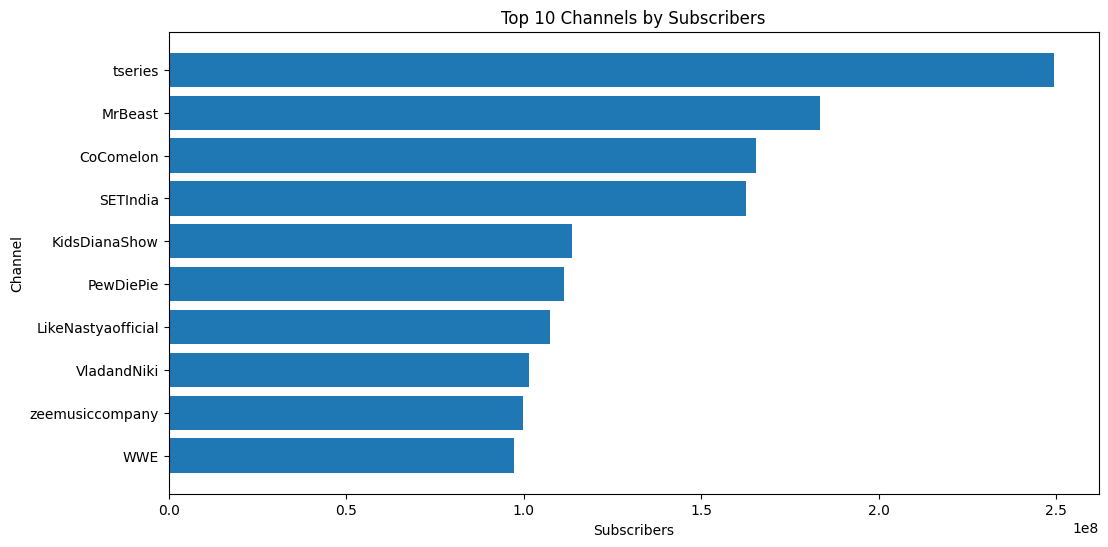

In [16]:
top_10_channels = df.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_channels['Username'], top_10_channels['Subscribers'])
plt.xlabel('Subscribers')
plt.ylabel('Channel')
plt.title('Top 10 Channels by Subscribers')
plt.gca().invert_yaxis()
plt.show()

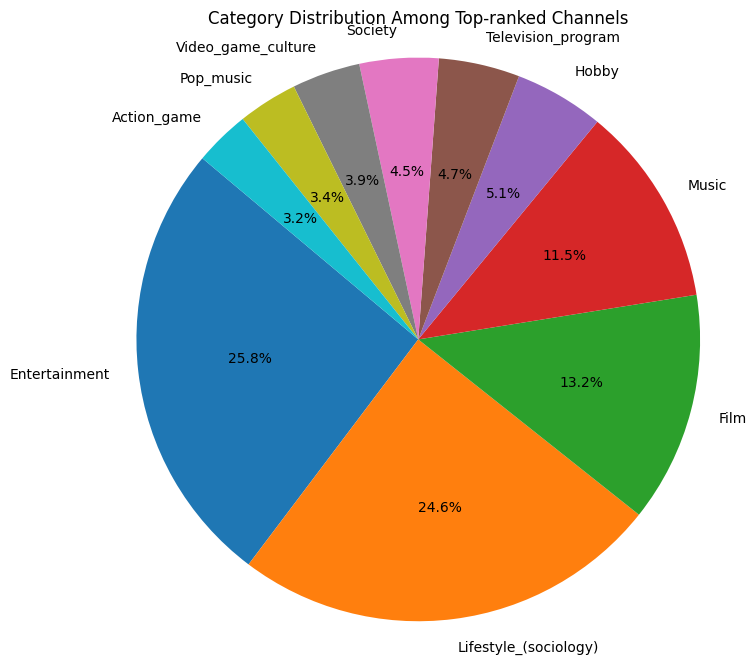

In [17]:
category_distribution = df['Categories'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Category Distribution Among Top-ranked Channels')
plt.show()

### Removing Outliers

In [18]:
# Encoder
encoder = OrdinalEncoder()

# Define the columns to encode
cols_to_encode = ["Country", "Categories"]

# Fit and transform the selected columns
encoded_values = encoder.fit_transform(df[cols_to_encode])

# Create a DataFrame with the encoded values and the original index
encoded_df = pd.DataFrame(encoded_values, columns=cols_to_encode, index=df.index)

# Update the original DataFrame with the encoded values
df[cols_to_encode] = encoded_df

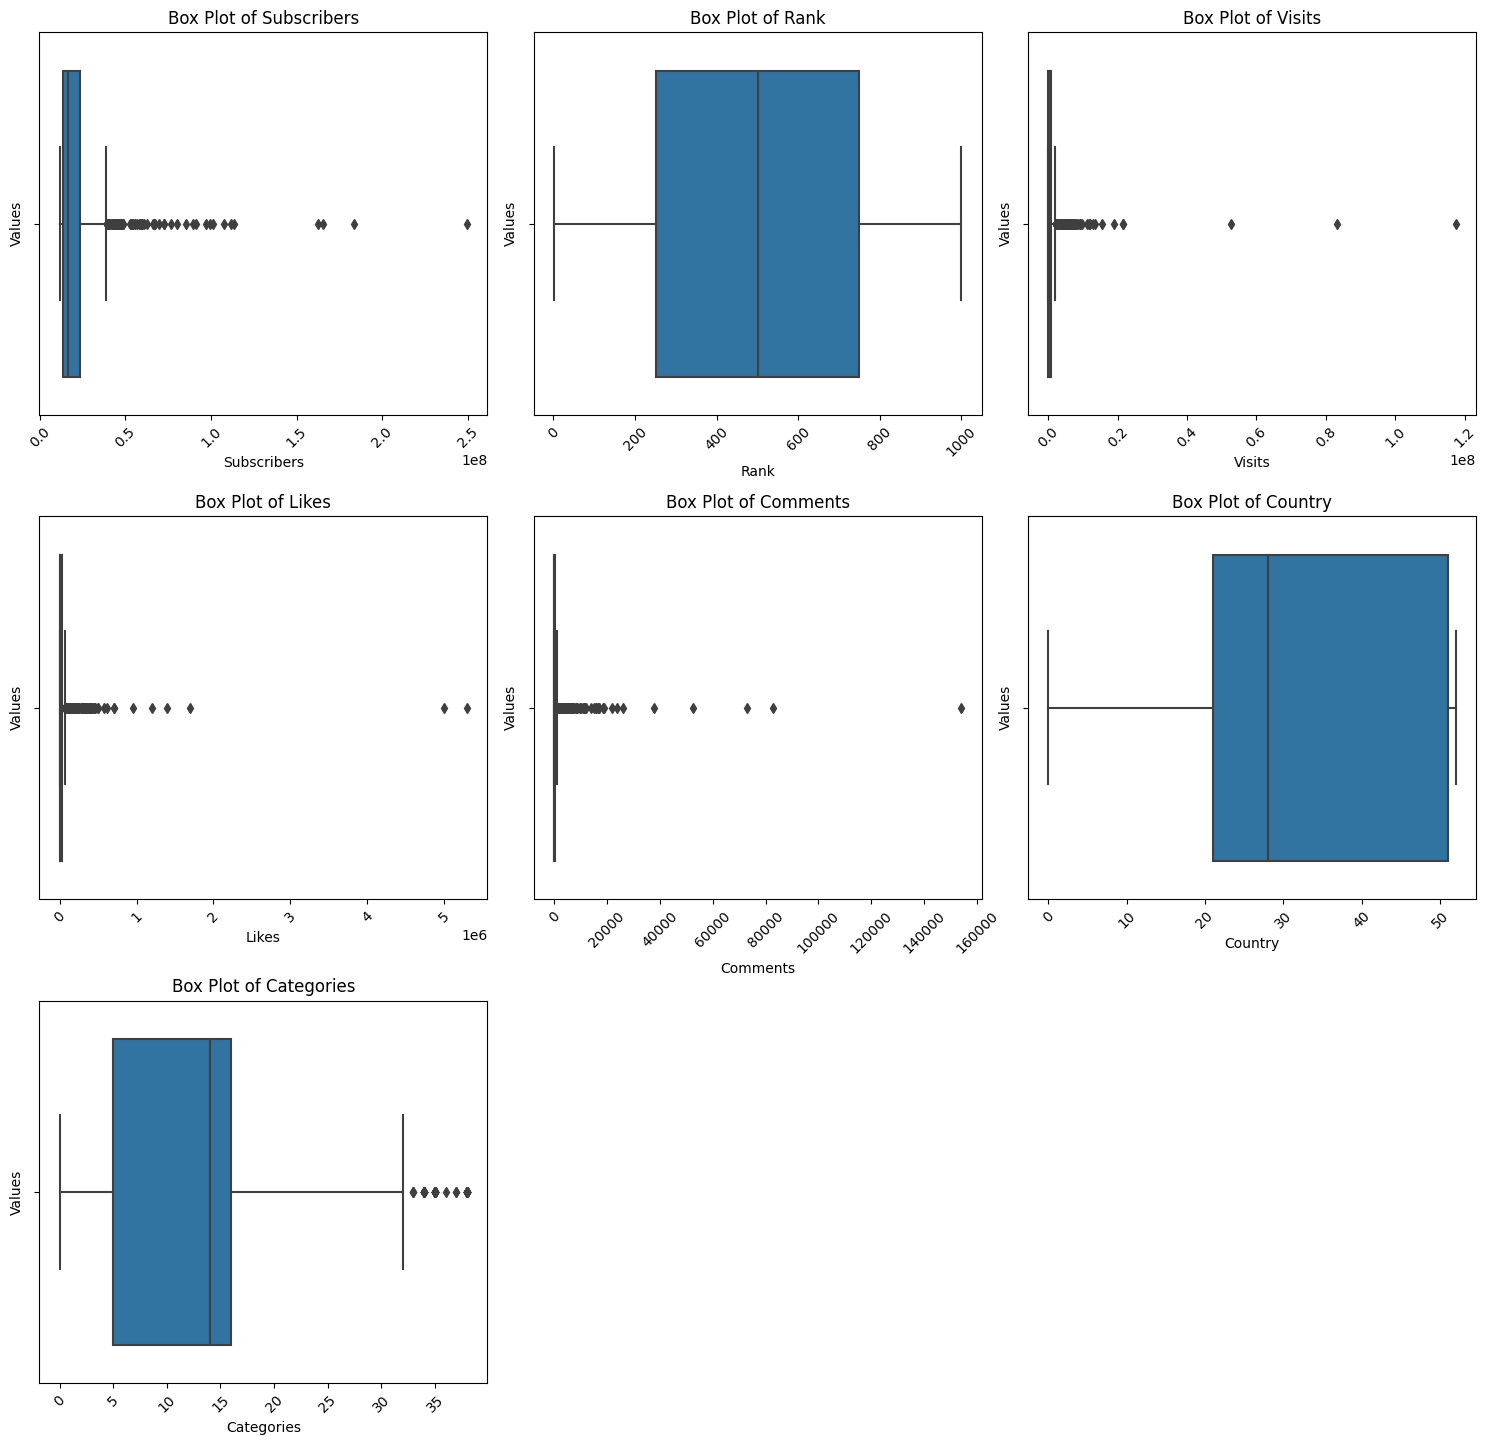

In [19]:
# List of numeric columns
numeric_columns = ["Subscribers", "Rank", "Visits", "Likes", "Comments", "Country", "Categories"]

# The number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + 1
num_cols = 3
# Increase the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create the plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Values")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()

In [20]:
# Define the columns for which you want to remove outliers
columns_to_check = ["Subscribers", "Rank", "Visits", "Likes", "Comments", "Country", "Categories"]

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loop through the columns and remove outliers
for column in columns_to_check:
    df_no = remove_outliers(df, column)

print("Original Shape:", df.shape)
print("Filtered Shape:", df_no.shape)

Original Shape: (1000, 10)
Filtered Shape: (912, 10)


In [21]:
df_no.describe()

,Rank,Categories,Subscribers,Country,Visits,Likes,Comments,Likes_Per_Visit
count,912.000000,912.000000,9.120000e+02,912.000000,912.0,912.0,912.0,912.0
mean,503.278509,11.338816,2.207160e+07,31.960526,1234384.666667,52961.482456,1193.682018,<NA>
std,289.893302,7.206710,1.740545e+07,16.555086,5446808.314975,266055.136798,6793.155083,<NA>
min,1.000000,0.000000,1.170000e+07,0.000000,0.0,0.0,0.0,<NA>
25%,250.750000,5.000000,1.377500e+07,21.750000,28650.0,414.5,2.0,<NA>
50%,507.500000,10.000000,1.670000e+07,28.000000,163900.0,3200.0,57.0,<NA>
75%,757.250000,16.000000,2.382500e+07,51.000000,872050.0,27425.0,416.5,<NA>
max,1000.000000,32.000000,2.495000e+08,52.000000,117400000.0,5300000.0,154000.0,<NA>


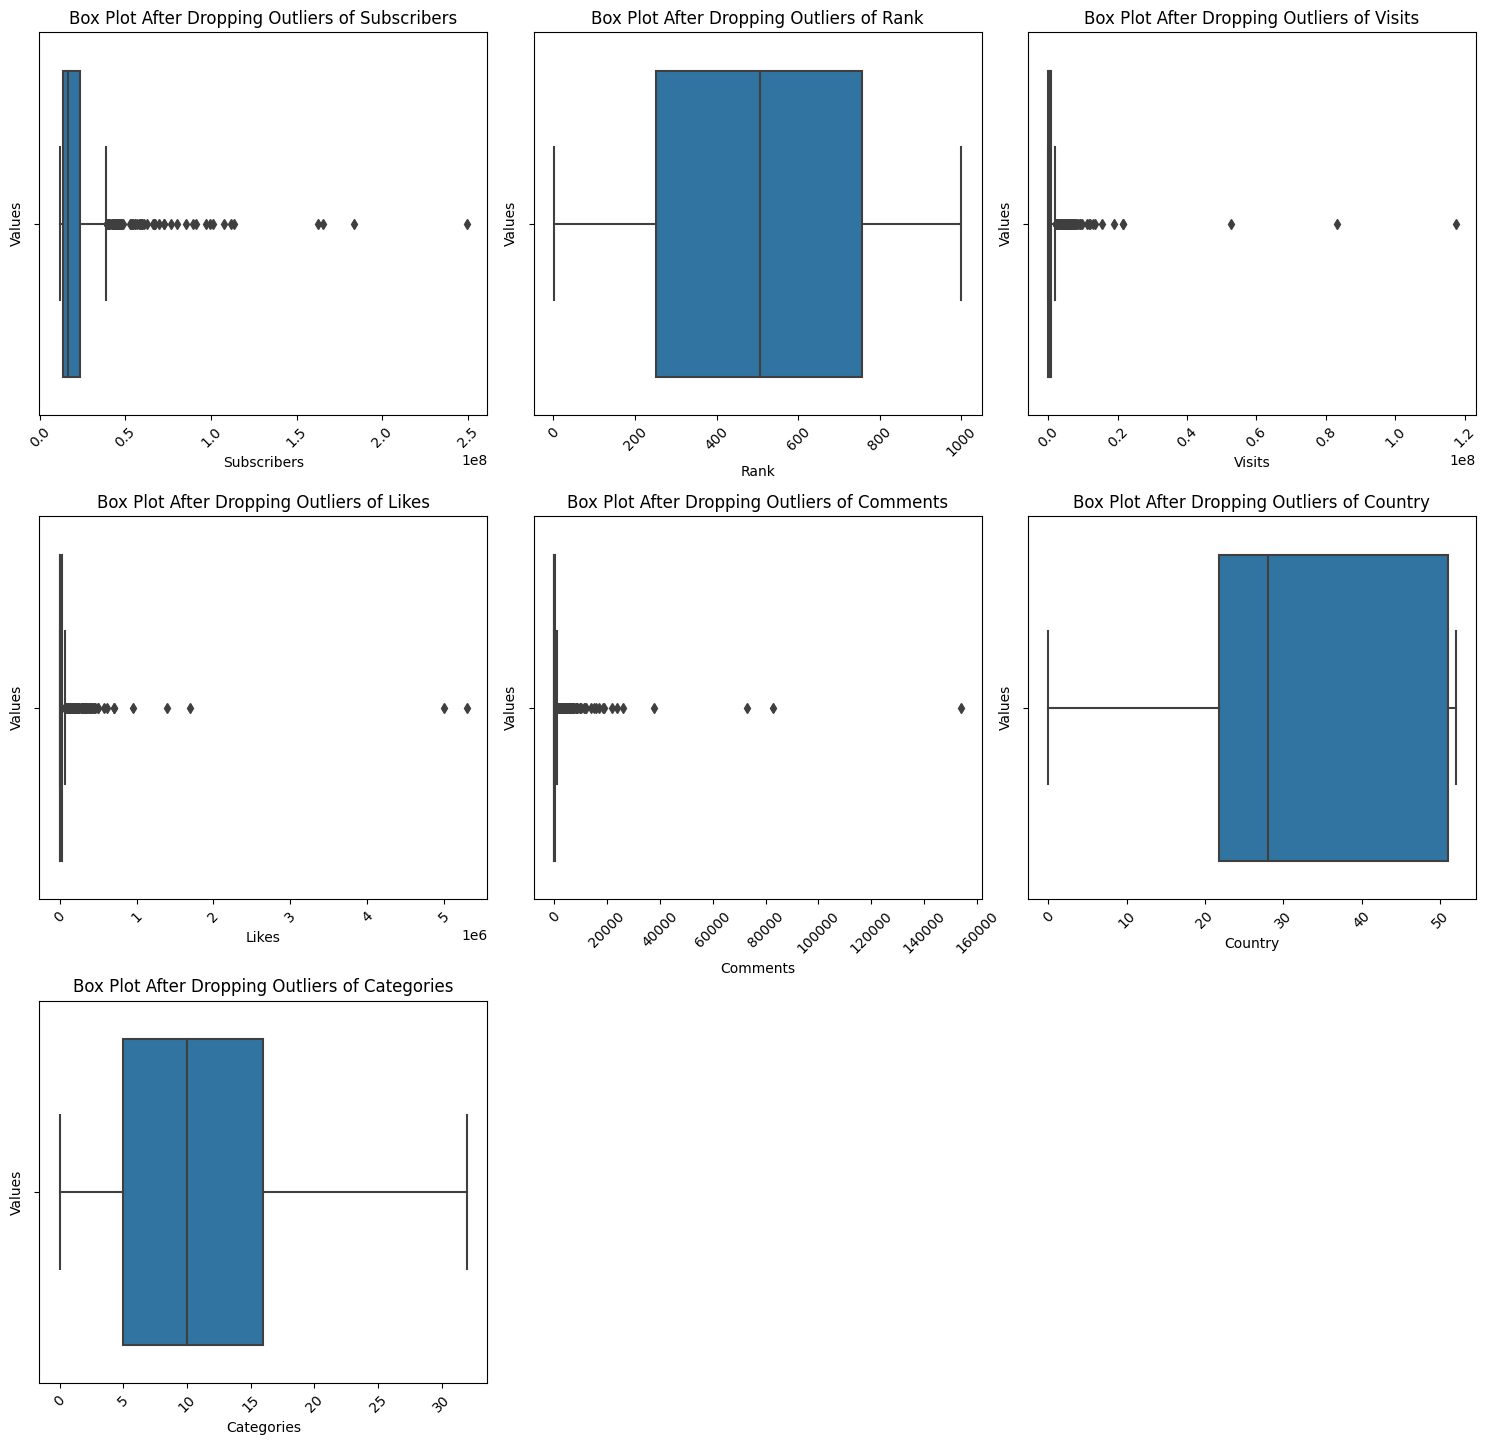

In [22]:
# List of numeric columns
numeric_columns = ["Subscribers", "Rank", "Visits", "Likes", "Comments", "Country", "Categories"]

# The number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + 1
num_cols = 3

# Increase the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create the plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=column, data=df_no)
    plt.title(f'Box Plot After Dropping Outliers of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Values")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()

### Training Data Splits

In [23]:
# Case 1: 20% of the data for training
train_case1, test_case1 = train_test_split(df_no, train_size=0.2, random_state=42)

# Case 2: 80% of the data for training
train_case2, test_case2 = train_test_split(df_no, train_size=0.8, random_state=42)

# Printing 
print("Case 1:")
print("Training set shape:", train_case1.shape)
print("Testing set shape:", test_case1.shape)
print("\nCase 2:")
print("Training set shape:", train_case2.shape)
print("Testing set shape:", test_case2.shape)

Case 1:
Training set shape: (182, 10)
Testing set shape: (730, 10)

Case 2:
Training set shape: (729, 10)
Testing set shape: (183, 10)


### Correlation

In [24]:
correlation_matrix = df_no[["Subscribers", "Rank", "Visits", "Likes", "Comments", "Country", "Categories"]].corr().abs()
print("Correlation Matrix:")
correlation_matrix.head(6)

Correlation Matrix:


,Subscribers,Rank,Visits,Likes,Comments,Country,Categories
Subscribers,1.000000,0.633539,0.245716,0.215355,0.032793,0.022355,0.020734
Rank,0.633539,1.000000,0.102277,0.093378,0.039481,0.031691,0.014771
Visits,0.245716,0.102277,1.000000,0.953633,0.322847,0.075212,0.060204
Likes,0.215355,0.093378,0.953633,1.000000,0.314511,0.056442,0.054068
Comments,0.032793,0.039481,0.322847,0.314511,1.000000,0.004042,0.036463
Country,0.022355,0.031691,0.075212,0.056442,0.004042,1.000000,0.013260


1. **Subscribers**:
   - Strong correlation with **Rank** (0.6335).
   - Weak correlation with **Visits** (0.2457) and **Likes** (0.2154).
   - Very weak correlation with **Comments** (0.0328).
   - Almost no correlation with **Country** and **Categories** (all close to zero).

2. **Rank**:
   - Strong correlation with **Subscribers** (0.6335).
   - Weak correlation with **Visits** (0.1023) and **Likes** (0.0934).
   - Very weak correlation with **Comments** (0.0395).
   - Almost no correlation with **Country** and **Categories**.

3. **Visits**:
   - Weak correlation with **Likes** (0.9536) and a bit weaker correlation with **Comments** (0.3228).
   - Weak correlation with **Subscribers** (0.2457) and **Rank** (0.1023).
   - Very weak correlation with **Country** and **Categories**.

4. **Likes**:
   - Strong correlation with **Visits** (0.9536).
   - Weak correlation with **Comments** (0.3145).
   - Weak correlation with **Subscribers** (0.2154) and **Rank** (0.0934).
   - Very weak correlation with **Country** and **Categories**.

5. **Comments**:
   - Weak correlation with **Visits** (0.3228) and **Likes** (0.3145).
   - Very weak correlation with **Subscribers** (0.0328) and **Rank** (0.0395).
   - Almost no correlation with **Country** and **Categories**.

6. **Country**:
   - Very weak correlation with all other variables, but especially weak with **Subscribers**, **Rank**, and **Likes**.

7. **Categories**:
   - Very weak correlation with all other variables, similar to **Country**.


In [25]:
# Categorise other features
other_features = ["Rank", "Visits", "Likes", "Comments", "Country", "Categories"]

Added features to compare with subscribers

In [26]:
columns_of_interest = ["Subscribers", "Rank", "Visits", "Likes", "Comments", "Country", "Categories"]

# Calculate the correlation matrix with absolute values
correlation_matrix = df_no[columns_of_interest].corr().abs()

# Sort the correlation values in descending order based on the "Subscribers" column
sorted_correlation = correlation_matrix["Subscribers"].sort_values(ascending=False)

# Display the sorted correlations
print("Correlation Matrix (Sorted by Correlation to Subscribers):")
print(sorted_correlation)

Correlation Matrix (Sorted by Correlation to Subscribers):
Subscribers    1.000000
Rank           0.633539
Visits         0.245716
Likes          0.215355
Comments       0.032793
Country        0.022355
Categories     0.020734
Name: Subscribers, dtype: float64


This correlation matrix provides insights into the relationships between different variables and their correlation with the "Subscribers" variable. 

- **Rank**: It has a correlation of approximately 0.634 with Subscribers. This suggests that there is a moderately linear relationship between the rank and the number of subscribers.

- **Visits**: It has a correlation of approximately 0.246 with Subscribers. This indicates a weaker linear relationship between the number of visits and the number of subscribers.

- **Likes**: It has a correlation of approximately 0.215 with Subscribers. This implies a weaker linear relationship between the number of likes and the number of subscribers.

- **Comments**: It has a very weak correlation of approximately 0.033 with Subscribers, suggesting that there's only a slight linear relationship between the number of comments and the number of subscribers.

- **Country**: It has a correlation of approximately 0.022 with Subscribers. This suggests a very weak linear relationship between the country and the number of subscribers. It's important to note that the correlation between a categorical variable like "Country" and a numerical variable may not provide meaningful insights in this context.

- **Categories**: It has a correlation of approximately 0.021 with Subscribers. Like "Country," this indicates a very weak linear relationship between the categories and the number of subscribers.

### Linear Regression Model

In [27]:
# Define function to train and evaluate a linear regression model with RFE
def train_and_evaluate_model(features, train_data, test_data):
    X_train = train_data[features]
    y_train = train_data["Subscribers"]
    X_test = test_data[features]
    y_test = test_data["Subscribers"]
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Apply Recursive Feature Elimination (RFE) to select features
    rfe = RFE(model, n_features_to_select=2)
    rfe.fit(X_train, y_train)

    # Get the selected features
    selected_features = list(X_train.columns[rfe.support_])
    
    # Get the feature rankings
    feature_rankings = rfe.ranking_
    
    # Create a dictionary to map each feature to its selection status
    feature_selection_status = {feature: ranking for feature, ranking in zip(X_train.columns, feature_rankings)}
    
    # Train the model with the selected features
    model.fit(X_train[selected_features], y_train)
    
    # Make predictions
    y_pred = model.predict(X_test[selected_features])
    
    # Calculate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Return results
    return model, mse, rmse, r2, mae, feature_selection_status

# Train and evaluate the models
model_1, mse_1, rmse_1, r2_1, mae_1, feature_selection_status_1 = train_and_evaluate_model(other_features, train_case1, test_case1)
model_2, mse_2, rmse_2, r2_2, mae_2, feature_selection_status_2 = train_and_evaluate_model(other_features, train_case1, test_case1)

# Print the model performance scores
print("Model 1 MSE:", mse_1, "RMSE:", rmse_1, "R-squared (r2):", r2_1, "MAE:", mae_1)

# Print the selected features and their selection status for Model 1
print("\nSelected Features for Model 1:")
for feature, ranking in feature_selection_status_1.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

# Print the model performance scores
print("Model 2 MSE:", mse_2, "RMSE:", rmse_2, "R-squared (r2):", r2_2, "MAE:", mae_2)

# Print the selected features and their selection status for Model 2
print("\nSelected Features for Model 2:")
for feature, ranking in feature_selection_status_2.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

Model 1 MSE: 181078813850362.34 RMSE: 13456552.821966046 R-squared (r2): 0.3839433070035747 MAE: 7081249.716675539

Selected Features for Model 1:
Rank: Selected
Visits: Not Selected
Likes: Not Selected
Comments: Not Selected
Country: Selected
Categories: Not Selected
Model 2 MSE: 181078813850362.34 RMSE: 13456552.821966046 R-squared (r2): 0.3839433070035747 MAE: 7081249.716675539

Selected Features for Model 2:
Rank: Selected
Visits: Not Selected
Likes: Not Selected
Comments: Not Selected
Country: Selected
Categories: Not Selected


It appears that you have provided the evaluation metrics and selected features for two different models (Model 1 and Model 2). Here's an analysis of the provided information:

1. **Mean Squared Error (MSE):** The MSE for both Model 1 and Model 2 is the same, indicating that they have the same level of error. In this case, the value is very high, suggesting that the models may not be performing well in terms of predicting the target variable.

2. **Root Mean Squared Error (RMSE):** The RMSE for both models is also the same, and it is approximately 13,456,552.82. RMSE represents the average magnitude of the error in the predicted values. A high RMSE indicates a substantial error in the predictions.

3. **R-squared (r2):** The R-squared value for both models is approximately 0.38. R-squared measures how well the model explains the variance in the target variable. An R-squared of 0.38 means that the models explain only 38% of the variance in the data, which is relatively low.

4. **Mean Absolute Error (MAE):** The MAE for both Model 1 and Model 2 is approximately 7,081,249.72. MAE represents the average absolute error between the predicted and actual values. A lower MAE is desirable, but the provided value is still relatively high.

5. **Selected Features:** Both Model 1 and Model 2 have the same set of selected features, which are "Rank" and "Country." The other features, "Visits," "Likes," "Comments," and "Categories," are not selected. This suggests that these two models are based on the same set of features and thus have performance.

In summary, based on the provided information, both Model 1 and Model 2 have the same feature selection and very similar performance metri, , including high MSE, RMSE, and relatively low R-squared and MAE. This may indicate that these models are not effectively capturing the underlying patterns in the data or that there might be issues with the dataset or the modeling approach. Further analysis and potentially the inclusion of additional features or model tuning may be necessary to improve their predictive performance..

In [28]:
# Define function to train and evaluate a polynomial regression model with RFE
def train_and_evaluate_polynomial_model(features, train_data, test_data, degree, n_features_to_select):
    X_train = train_data[features]
    y_train = train_data["Subscribers"]
    X_test = test_data[features]
    y_test = test_data["Subscribers"]
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Apply Recursive Feature Elimination (RFE) to select features on the original features
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = list(X_train.columns[rfe.support_])
    
    # Get the feature rankings
    feature_rankings = rfe.ranking_
    
    # Create a dictionary to map each feature to its selection status
    feature_selection_status = {feature: ranking for feature, ranking in zip(X_train.columns, feature_rankings)}
    
    # Create a polynomial regression model
    poly = PolynomialFeatures(degree=degree)
    
    # Apply polynomial transformation to the selected features
    X_train_poly = poly.fit_transform(X_train[selected_features])
    X_test_poly = poly.transform(X_test[selected_features])
    
    # Train the model with the polynomial features
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    
    # Calculate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Return results
    return model, mse, rmse, r2, mae, selected_features, feature_selection_status

# Train and evaluate the models with polynomial regression and RFE
model_1, mse_poly_1, rmse_poly_1, r2_poly_1, mae_poly_1, poly_features_1, feature_poly_status_1 = train_and_evaluate_polynomial_model(other_features, train_case1, test_case1, degree=2, n_features_to_select=3)
model_2, mse_poly_2, rmse_poly_2, r2_poly_2, mae_poly_2, poly_features_2, feature_poly_status_2 = train_and_evaluate_polynomial_model(other_features, train_case1, test_case1, degree=2, n_features_to_select=3)

# Print the model performance scores
print("Model 1 MSE:", mse_poly_1, "RMSE:", rmse_poly_1, "R-squared (r2):", r2_poly_1, "MAE:", mae_poly_1)

# Print the selected features for Model 1
print("\nSelected Features for Model 1:")
for feature, ranking in feature_poly_status_1.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

# Print the model performance scores
print("\nModel 2 MSE:", mse_poly_2, "RMSE:", rmse_poly_2, "R-squared (r2):", r2_poly_2, "MAE:", mae_poly_2)

for feature, ranking in feature_poly_status_2.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

Model 1 MSE: 132286300311676.53 RMSE: 11501578.1661334 R-squared (r2): 0.549942597005915 MAE: 5739500.975537241

Selected Features for Model 1:
Rank: Selected
Visits: Not Selected
Likes: Not Selected
Comments: Not Selected
Country: Selected
Categories: Selected

Model 2 MSE: 132286300311676.53 RMSE: 11501578.1661334 R-squared (r2): 0.549942597005915 MAE: 5739500.975537241
Rank: Selected
Visits: Not Selected
Likes: Not Selected
Comments: Not Selected
Country: Selected
Categories: Selected


## **Comparison Analysis:**

1. **Polynomial vs. Non-Polynomial:**
   - Both Model 1 and Model 2 show a significant improvement when polynomial features are added. The MSE, RMSE, and R-squared values are much better in the models with polynomial features, indicating a better fit to the data.
   - In both cases, the MAE is lower when polynomial features are used, indicating that the models with polynomial features have smaller errors.

2. **Feature Selection:**
   - Regardless of whether polynomial features are used or not, the selected features for both Model 1 and Model 2 are the same. The selected features are "Rank" and "Country," while "Visits," "Likes," "Comments," and "Categories" are not selected in either case.

3. **Overall Performance:**
   - Model 1 and Model 2 have the same performance metrics, suggesting that the choice of adding polynomial features or not does not impact the model's performance in terms of these metrics.

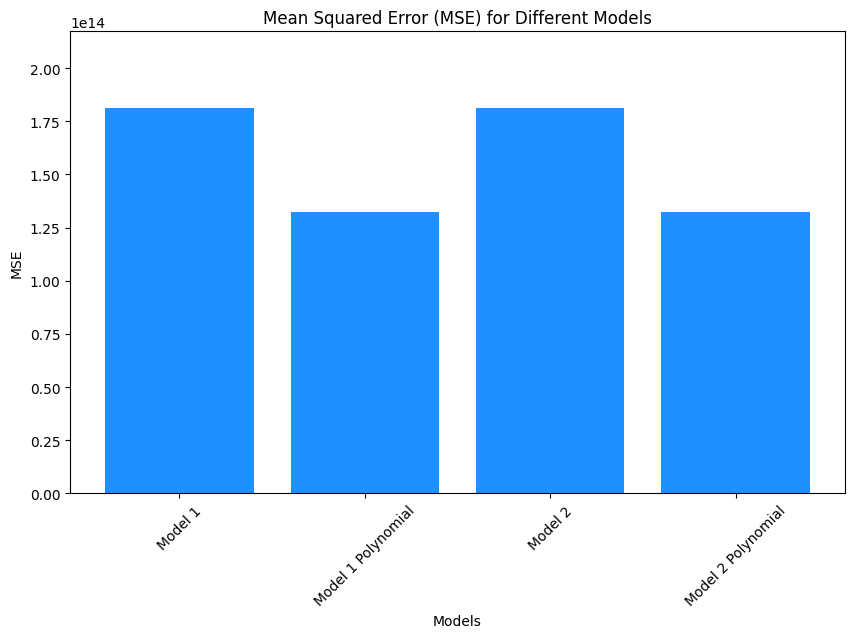

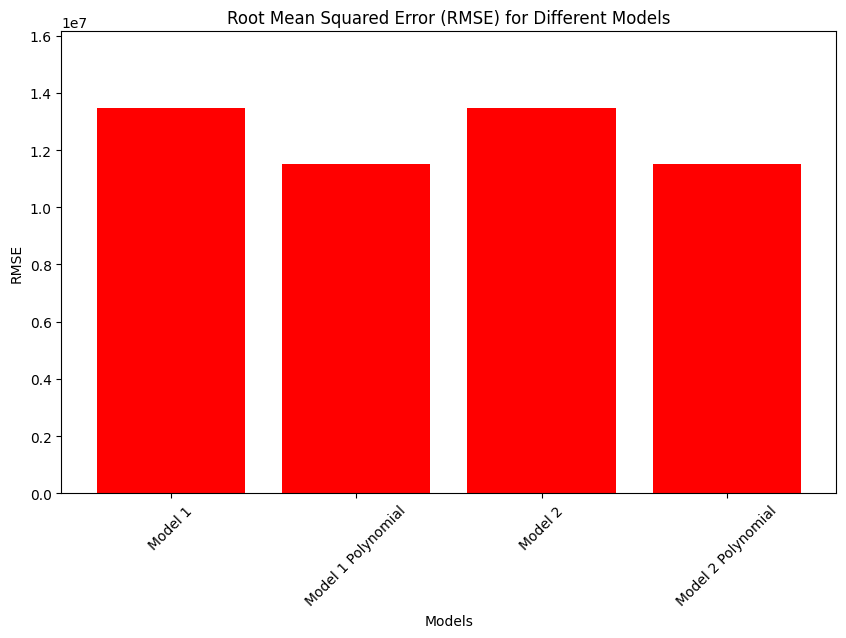

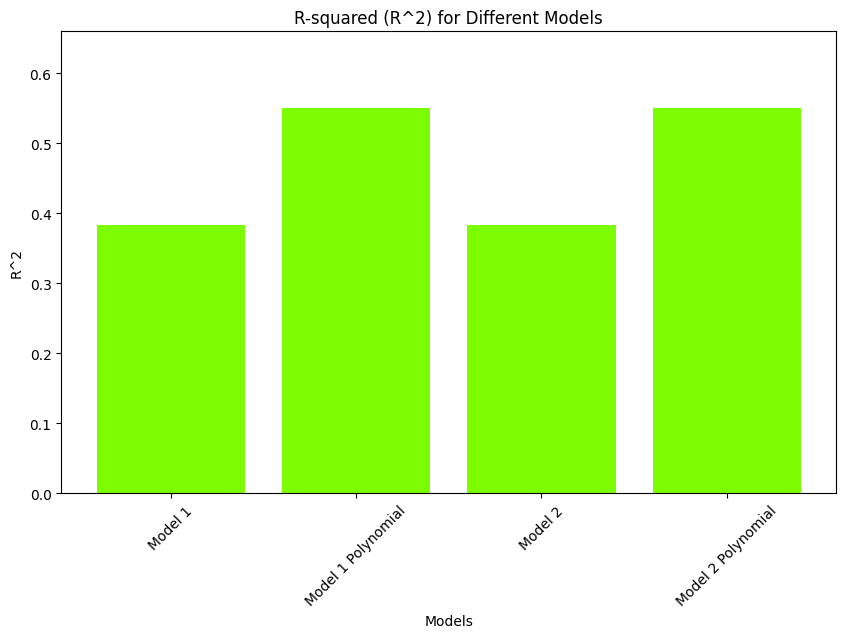

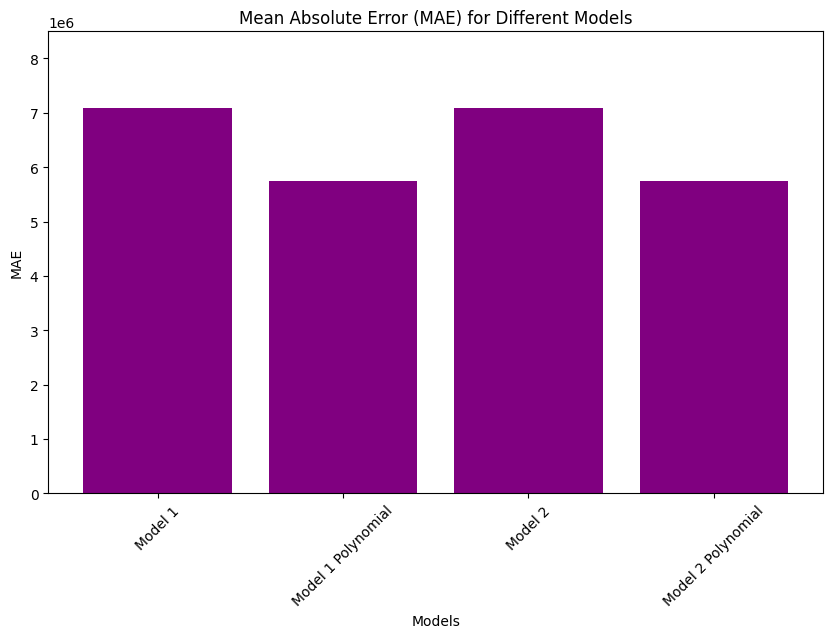

In [29]:
# Create data for MSE values
models = ["Model 1", "Model 1 Polynomial", "Model 2", "Model 2 Polynomial"]
mse_values = [mse_1, mse_poly_1, mse_2, mse_poly_2]

# Create a bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='dodgerblue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) * 1.2)
plt.xticks(rotation=45)

# Display the MSE bar chart
plt.show()

# Create data for RMSE values
models = ["Model 1", "Model 1 Polynomial", "Model 2", "Model 2 Polynomial"]
rmse_values = [rmse_1, rmse_poly_1, rmse_2, rmse_poly_2]

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='red')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.2)
plt.xticks(rotation=45)

# Display the RMSE bar chart
plt.show()

# Create data for R^2 values
models = ["Model 1", "Model 1 Polynomial", "Model 2", "Model 2 Polynomial"]
r2_values = [r2_1, r2_poly_1, r2_2, r2_poly_2]

# Create a bar chart for R^2
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='lawngreen')
plt.title('R-squared (R^2) for Different Models')
plt.xlabel('Models')
plt.ylabel('R^2')
plt.ylim(0, max(r2_values) * 1.2)
plt.xticks(rotation=45)

# Display the R^2 bar chart
plt.show()

# Create data for MAE values
models = ["Model 1", "Model 1 Polynomial", "Model 2", "Model 2 Polynomial"]
mae_values = [mae_1, mae_poly_1, mae_2, mae_poly_2]

# Create a bar chart for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='purple')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(0, max(mae_values) * 1.2)
plt.xticks(rotation=45)

# Display the MAE bar chart
plt.show()

### Logistic Regression Model

In [30]:
# Define a function to train and evaluate the logistic regression model with RFE
def train_and_evaluate_logistic_regression_with_rfe(features, train_data, test_data, n_features_to_select=2):
    X_train = train_data[features]
    y_train = train_data["Subscribers"]
    X_test = test_data[features]
    y_test = test_data["Subscribers"]
    
    # Create a logistic regression model
    model = LogisticRegression()
    
    # Apply Recursive Feature Elimination (RFE) to select features
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = list(X_train.columns[rfe.support_])
    
    # Get the feature rankings (ranking 1 indicates selected, ranking 0 indicates not selected)
    feature_rankings = rfe.ranking_
    
    # Create a dictionary to map each feature to its selection status
    feature_selection_status = {feature: ranking for feature, ranking in zip(X_train.columns, feature_rankings)}
    
    # Train the logistic regression model with the selected features
    model.fit(X_train[selected_features], y_train)
    
    # Predict ratings on the test data
    y_pred = model.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Display classification report and confusion matrix
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    return model, accuracy, report, confusion, selected_features, feature_selection_status

# Train and evaluate the logistic regression models with RFE
logistic_model_1, accuracy_1, report_1, confusion_1, log_features_1, selection_status_1 = train_and_evaluate_logistic_regression_with_rfe(other_features, train_case1, test_case1, n_features_to_select=3)
logistic_model_2, accuracy_2, report_2, confusion_2, log_features_2, selection_status_2 = train_and_evaluate_logistic_regression_with_rfe(other_features, train_case2, test_case2, n_features_to_select=3)

# Print the selected features and their selection status for Model 1
print("\nSelected Features for Model 1:")
for feature, ranking in selection_status_1.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

# Print model 1
print("\nLogistic Regression Model 1 Accuracy:", accuracy_1)
print("Classification Report Model 1:\n", report_1)
print("Confusion Matrix of Model 1:\n", confusion_1)

# Print the selected features and their selection status for Model 2
print("\nSelected Features for Model 2:")
for feature, ranking in selection_status_2.items():
    selection_status = "Selected" if ranking == 1 else "Not Selected"
    print(f"{feature}: {selection_status}")

# Print model 2
print("\nLogistic Regression Model 2 Accuracy:", accuracy_2)
print("Classification Report of Model 2:\n", report_2)
print("Confusion Matrix of Model 2:\n", confusion_2)


Selected Features for Model 1:
Rank: Not Selected
Visits: Selected
Likes: Selected
Comments: Selected
Country: Not Selected
Categories: Not Selected

Logistic Regression Model 1 Accuracy: 0.0027397260273972603
Classification Report Model 1:
               precision    recall  f1-score   support

  11700000.0       0.00      0.00      0.00        12
  11800000.0       0.00      0.00      0.00         2
  11900000.0       0.00      0.00      0.00        22
  12000000.0       0.00      0.00      0.00         4
  12100000.0       0.00      0.00      0.00         5
  12200000.0       0.00      0.00      0.00        11
  12300000.0       0.00      0.00      0.00         4
  12400000.0       0.00      0.00      0.00        17
  12500000.0       0.00      0.00      0.00         4
  12600000.0       0.00      0.00      0.00        25
  12700000.0       0.00      0.00      0.00         2
  12800000.0       0.04      0.12      0.06         8
  12900000.0       0.00      0.00      0.00         7


Both models have the same selected features and seem to have very low accuracy. The classification reports show that these models perform poorly for multiple classes, with precision, recall, and F1-score all being 0 for several classes.

It's important to note that these models may be underfitting the data or not capturing the relationships between the selected features and the target variable effectively. Further analysis and potentially different modeling approaches may be necessary to improve the performance of these models. Additionally, you may want to consider data preprocessing, feature engineering, or trying different algorithms to enhance model performance.

### KNN Model

In [31]:
# Define a function to train and evaluate the KNN classification model
def train_and_evaluate_knn(features, train_data, test_data, n_neighbors=10):
    X_train = train_data[features]
    y_train = train_data["Subscribers"]
    X_test = test_data[features]
    y_test = test_data["Subscribers"]
    
    # Create and train a KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    
    # Predict ratings on the test data
    y_pred = knn_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return knn_model, accuracy

# Train and evaluate the models
model_1, accuracy_1 = train_and_evaluate_knn(other_features, train_case1, test_case1)
model_2, accuracy_2 = train_and_evaluate_knn(other_features, train_case2, test_case2)

# Print the model performance scores
print("KNN Model 1 Accuracy:", accuracy_1)
print("KNN Model 2 Accuracy:", accuracy_2)

KNN Model 1 Accuracy: 0.015068493150684932
KNN Model 2 Accuracy: 0.02185792349726776


In [32]:
# Define search space for parameters
param_grid = {"n_neighbors": range(1, 100)}

# Define a function to perform KNN classification with hyperparameter tuning
def train_and_evaluate_knn_with_tuning(features, train_data, test_data, param_grid):
    X_train = train_data[features]
    y_train = train_data["Subscribers"]
    X_test = test_data[features]
    y_test = test_data["Subscribers"]
    
    # Create a KNN classification model
    knn_model = KNeighborsClassifier()
    
    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=5)
    
    # Fit the model with the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    
    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, accuracy

# Train and evaluate the KNN models with hyperparameter tuning
best_model_case1, best_params_case1, accuracy_tune1 = train_and_evaluate_knn_with_tuning(other_features, train_case1, test_case1, param_grid)
best_model_case2, best_params_case2, accuracy_tune2 = train_and_evaluate_knn_with_tuning(other_features, train_case2, test_case2, param_grid)


# Print the best hyperparameters and accuracy scores for both cases
print("Best Hyperparameters (Model 1):", best_params_case1)
print("KNN Model Accuracy (Model 1):", accuracy_tune1)
print("\nBest Hyperparameters (Model 2):", best_params_case2)
print("KNN Model Accuracy (Model 2):", accuracy_tune2)

Best Hyperparameters (Model 1): {'n_neighbors': 43}
KNN Model Accuracy (Model 1): 0.01780821917808219

Best Hyperparameters (Model 2): {'n_neighbors': 99}
KNN Model Accuracy (Model 2): 0.01639344262295082


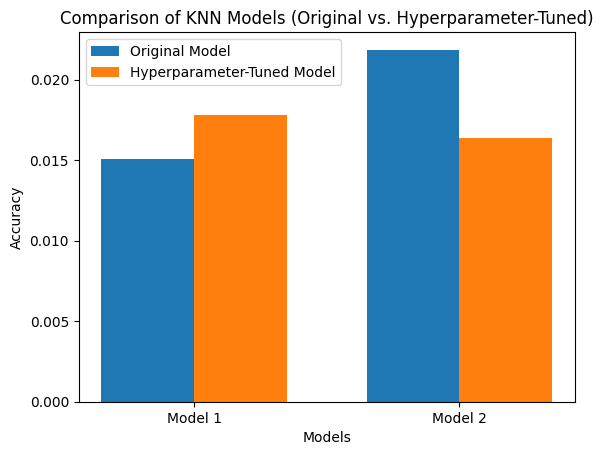

In [33]:
# Accuracy scores for the original KNN models
original_accuracy = [accuracy_1, accuracy_2]

# Accuracy scores for the hyperparameter-tuned KNN models
tuned_accuracy = [accuracy_tune1, accuracy_tune2]

# Model labels
model_labels = ['Model 1', 'Model 2']

# Bar width
bar_width = 0.35

# X-axis values for the bar chart
x = range(len(model_labels))

# Create a bar chart
fig, ax = plt.subplots()
original_bars = ax.bar(x, original_accuracy, bar_width, label='Original Model')
tuned_bars = ax.bar([i + bar_width for i in x], tuned_accuracy, bar_width, label='Hyperparameter-Tuned Model')

# Set labels, titles, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of KNN Models (Original vs. Hyperparameter-Tuned)')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(model_labels)
ax.legend()

# Display the bar chart
plt.show()

# KNN Model Comparison

## Model Performance

- **KNN Model 1 Accuracy:** 0.0151
- **KNN Model 2 Accuracy:** 0.0219

It's evident that Model 2 has a higher accuracy compared to Model 1. However, accuracy alone might not provide a complete picture of model performance.

## Hyperparameters

### Model 1

- **Best Hyperparameters (Model 1):** 43
- **KNN Model Accuracy (Model 1):** 0.0178

### Model 2

- **Best Hyperparameters (Model 2):** 99
- **KNN Model Accuracy (Model 2):** 0.0164

## Analysis

1. **Accuracy**: Model 2 has a higher accuracy (0.0219) compared to Model 1 (0.0151). This suggests that Model 2 makes more accurate predictions.

2. **Best Hyperparameters**: Model 1's best hyperparameter set to 43, resulted in an accuracy of 0.0178. In contrast, Model 2's best value is 99, and it achieved an accuracy of 0.0164. This implies that Model 1 may be more efficient in terms of the choice of the number of neighbors for prediction.

3. **Overall Performance**: While Model 2 has a higher accuracy, it's essential to consider other factors such as computational efficiency. Model 1, with its lower 'n_neighbors' value and slightly lower accuracy, might be more computationally efficient for real-time applications.

4. **Trade-off**: The choice between the two models depends on the specific requirements of your application. If accuracy is the top priority and computational resources are not a concern, Model 2 might be preferable. However, if efficiency is crucial, and a slightly lower accuracy is acceptable, Model 1 with the parameter set to 43 could be a better choice.

In summary, the choice between Model 1 and Model 2 should be based on the trade-off between accuracy and computational efficiency, considering the specific needs and constraints of your application.